**Target**: Investigating the connection between the amount of time dedicated to studying and the resulting academic scores.

**Dataset**: Our dataset comprises two primary columns - 'Hours' and 'Scores'. Each data point represents the number of hours a student devoted to studying and the corresponding score attained.

**Approach**: Leveraging the principles of linear regression, this project seeks to elucidate the potential correlation between study hours and academic achievement. The linear regression model employed here aims to establish a predictive relationship based on historical data, enabling us to estimate scores for given hours of study.

By meticulously processing the dataset and training the model, we delve into the intricate interplay between study hours and scores. Our formalized approach not only validates the intuitive belief in the positive relationship between effort and performance but also provides a quantitative framework for understanding its nuances.

**Implications**: This project holds implications for both educators and students alike, offering insights into the significance of structured study schedules and the potential outcome on academic success. The results not only contribute to the scholarly discourse on educational methodologies but also underline the potential of predictive analytics in shaping future learning paradigms.

Through rigorous data analysis and model interpretation, we aim to present a comprehensive understanding of the correlation between study hours and academic scores, exemplifying the power of statistical techniques in the realm of education.







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/kaggle/input/student-study-hours/score.csv')
df=pd.DataFrame(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


To see some information about the dataset

In [2]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Drop the missing values

In [3]:
df.dropna(inplace=True)

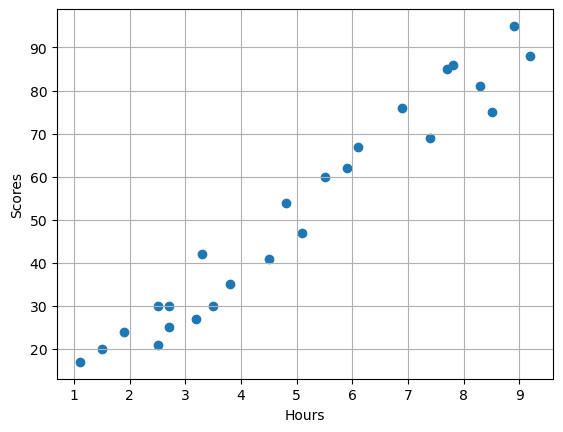

In [4]:
plt.scatter(df["Hours"], df["Scores"])
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

We can see in the above plot that there is a linear relationship btw Hours & Scores

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


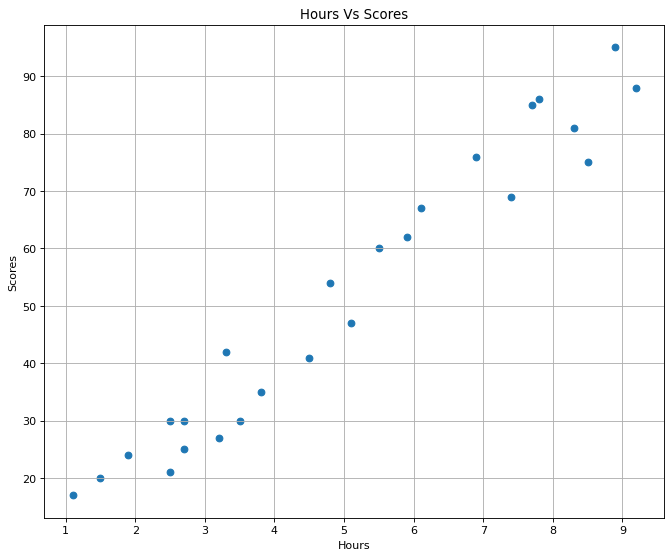

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
plt.figure(figsize=(10,8), dpi=80)
plt.scatter(df["Hours"], df["Scores"])
plt.grid()
plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

Normalize the data

In [6]:
x= df["Hours"].values.reshape(-1,1)
y= df["Scores"].values.reshape(-1,1)

I want to take a 20% (0.2) of my dataset be for testing

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

Creating a model, and see the slope and intercept

In [8]:
regressor= LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print(regressor.intercept_)
print(regressor.coef_)


[2.01816004]
[[9.91065648]]


I have generated a linear plot showcasing the model's performance. The red line accurately aligns with the data points, demonstrating a strong fit between the model and the dataset.

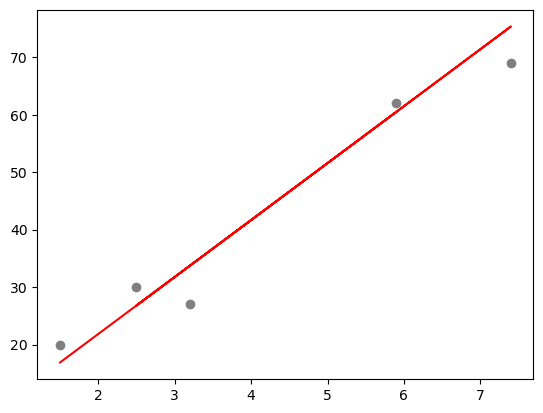

In [9]:
plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red')
plt.show()

important parameters

In [10]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2_Score: ', metrics.r2_score(y_test, y_pred))


Mean Absolute Error:  4.183859899002982
Mean Squared Error:  21.598769307217456
Root Mean Squared Error:  4.647447612100373
R2_Score:  0.9454906892105354


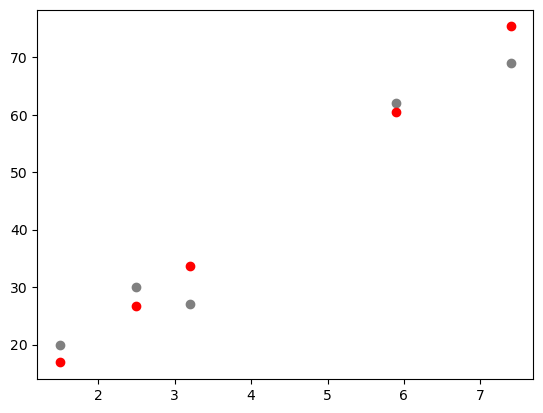

In [11]:
plt.scatter(x_test,y_test,color='gray')
plt.scatter(x_test,y_pred,color='red')
plt.show()

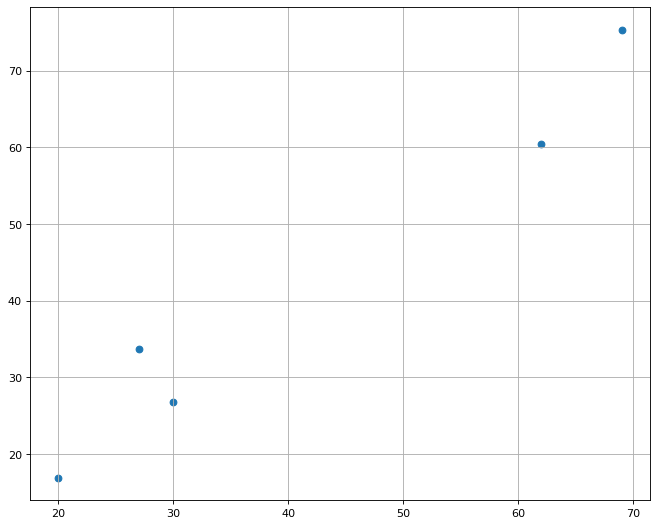

In [12]:
plt.figure(figsize=(10,8), dpi=80)
plt.scatter(y_test,y_pred)
plt.plot()
plt.grid()

In [13]:
compare=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


I want to add 3X and see the model results.

In [14]:
df2=pd.DataFrame({"Hours":[3,5.5,12],"Scores":[5,6,7]})
df2

,Hours,Scores
0,3.0,5
1,5.5,6
2,12.0,7


In [15]:
df3=df.append(df2)
df3

/tmp/ipykernel_20/3699628766.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3=df.append(df2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [16]:
train=df3.iloc[:25]
test=df3.iloc[25:]
test

,Hours,Scores
0,3.0,5
1,5.5,6
2,12.0,7


In [17]:
x_train=df3["Hours"][:25].values.reshape(-1,1)
y_train=df3["Scores"][:25].values.reshape(-1,1)

In [18]:
x_test=df3["Hours"][25:].values.reshape(-1,1)

In [19]:
regressor.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=regressor.predict(x_test)
y_pred

array([[ 31.81108358],
       [ 56.25059205],
       [119.79331409]])

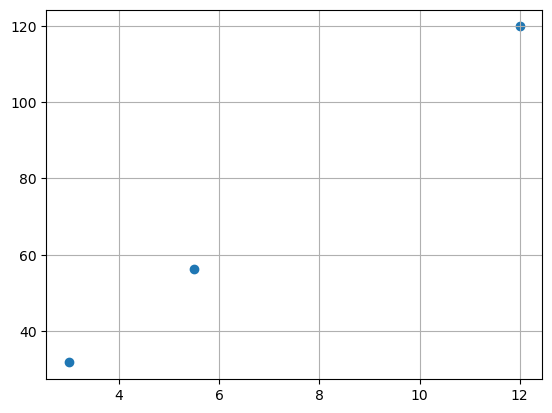

In [21]:
plt.scatter(x_test,y_pred)
plt.grid()